In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from utils import classification_evaluation, user_input
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
scaler = StandardScaler()

param_grid_linear_svc = {
    "svc__C": [0.1, 1, 10],
    "svc__penalty": ['l1', 'l2']
}

pipeline_linear_svc = Pipeline([
    ("scaler", scaler),
    ("svc", LinearSVC())
])

classifier_linear_svc = GridSearchCV(
    estimator=pipeline_linear_svc,
    param_grid=param_grid_linear_svc,
    cv=5,
    scoring="accuracy",
)



In [3]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')
dataframe = dataframe.drop(['age', 'id'], axis=1)

In [4]:
dataframe.head()

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,140,90,3,1,0,0,1,1,55,34.927679,1
1,130,70,3,1,0,0,0,1,52,23.507805,1
2,100,60,1,1,0,0,0,0,48,23.011177,1
3,130,80,3,1,0,0,1,0,61,37.729725,1
4,130,90,3,3,0,0,1,1,62,29.983588,0


In [5]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [6]:
X_train.shape  , X_test.shape, y_train.shape, y_test.shape

((31610, 10), (13548, 10), (31610,), (13548,))

In [7]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25288, 10), (6322, 10), (25288,), (6322,))

In [8]:
classifier_linear_svc.fit(X_train_for_val, y_train_for_val)

/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', LinearSVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [9]:
classifier_linear_svc.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svc', LinearSVC(C=0.1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svc': LinearSVC(C=0.1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svc__C': 0.1,
 'svc__class_weight': None,
 'svc__dual': True,
 'svc__fit_intercept': True,
 'svc__intercept_scaling': 1,
 'svc__loss': 'squared_hinge',
 'svc__max_iter': 1000,
 'svc__multi_class': 'ovr',
 'svc__penalty': 'l2',
 'svc__random_state': None,
 'svc__tol': 0.0001,
 'svc__verbose': 0}

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3188
           1       0.76      0.65      0.70      3134

    accuracy                           0.72      6322
   macro avg       0.73      0.72      0.72      6322
weighted avg       0.73      0.72      0.72      6322



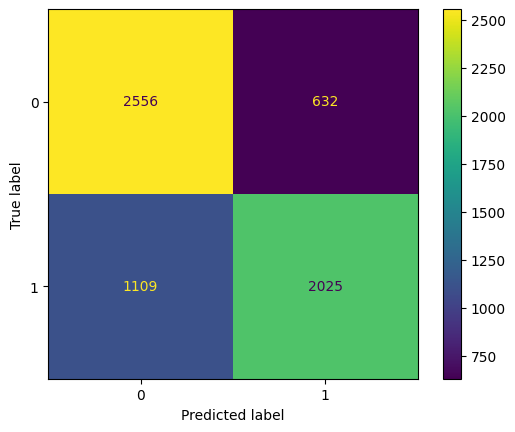

In [10]:
classification_evaluation(model=classifier_linear_svc, x_test=X_val, y_test=y_val)

In [11]:
classifier_linear_svc.fit(X_train, y_train)

/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', LinearSVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [12]:
y_predictions = classifier_linear_svc.predict(X_test)

In [13]:
print(y_predictions[:10], y_test[:10].to_list())

[0 1 0 0 1 1 0 0 1 0] [0, 1, 1, 1, 0, 0, 0, 0, 1, 0]


---

## Deployment

In [14]:
explainatory, response = dataframe.drop('cardio', axis=1), dataframe['cardio']

In [20]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", scaler), ("svc", LinearSVC(C=1))])

# fits on all data
pipe.fit(explainatory, response)

/Users/Cyrille/.local/share/virtualenvs/cardiovascular_labb-Oe2kFom0/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=1))])

In [21]:
user1 = user_input(ap_hi=[80], ap_lo=[60],cholesterol=[1], smoke=[0], active=[1],gluc=[1],alco=[0], age=[40],bmi=[29], gender=[1])
user1

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,80,60,1,1,0,0,1,40,29,1


In [17]:
user2 = user_input(ap_hi=[120], ap_lo=[100],cholesterol=[2], smoke=[1], active=[0],gluc=[1],alco=[0], age=[56],bmi=[32], gender=[1])
user2

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,120,100,2,1,1,0,0,56,32,1


In [22]:
pipe.predict(user1)

array([0])

In [23]:
pipe.predict(user2)

array([1])